<a href="https://colab.research.google.com/github/Keerthi-1321/Instagram_Trend_Analysis/blob/main/Instagram_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instagram Trend Analysis**

**Loading**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Instagram_data.csv', encoding='latin1')

**Data Exploration**

In [2]:
df.head(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...


In [3]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [5]:
df.isna().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


**Correlation Analysis**

In [7]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                Impressions  From Home  From Hashtags  From Explore  \
Impressions        1.000000   0.844698       0.560760      0.893607   
From Home          0.844698   1.000000       0.177516      0.800573   
From Hashtags      0.560760   0.177516       1.000000      0.190453   
From Explore       0.893607   0.800573       0.190453      1.000000   
From Other         0.592960   0.555666       0.229623      0.495685   
Saves              0.779231   0.768817       0.305929      0.747803   
Comments          -0.028524   0.012716       0.161439     -0.158565   
Shares             0.634675   0.674985       0.219511      0.615731   
Likes              0.849835   0.698330       0.662124      0.653699   
Profile Visits     0.760981   0.531076       0.691345      0.531850   
Follows            0.889363   0.672675       0.555485      0.796019   

                From Other     Saves  Comments    Shares     Likes  \
Impressions       0.592960  0.779231 -0.028524  0.634675  0.849835   
From Ho

**Feature Engineering**

In [8]:
# Derive the "Engagement Rate" feature
df['Engagement Rate'] = (df['Likes'] + df['Comments'] + df['Shares']) / df['Impressions']

# Print the updated DataFrame
print(df.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [9]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Impressions,3920,5394,4021,4528,2518,3884,2621,3541,3749,4115
From Home,2586,2727,2085,2700,1704,2046,1543,2071,2384,2609
From Hashtags,1028,1838,1188,621,255,1214,599,628,857,1104
From Explore,619,1174,0,932,279,329,333,500,248,178
From Other,56,78,533,73,37,43,25,60,49,46
Saves,98,194,41,172,96,74,22,135,155,122
Comments,9,7,11,10,5,7,5,4,6,6
Shares,5,14,1,7,4,10,1,9,8,3
Likes,162,224,131,213,123,144,76,124,159,191
Profile Visits,35,48,62,23,8,9,26,12,36,31


**Exploratory Data Analysis**

In [10]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Engagement Rate'],
      dtype='object')

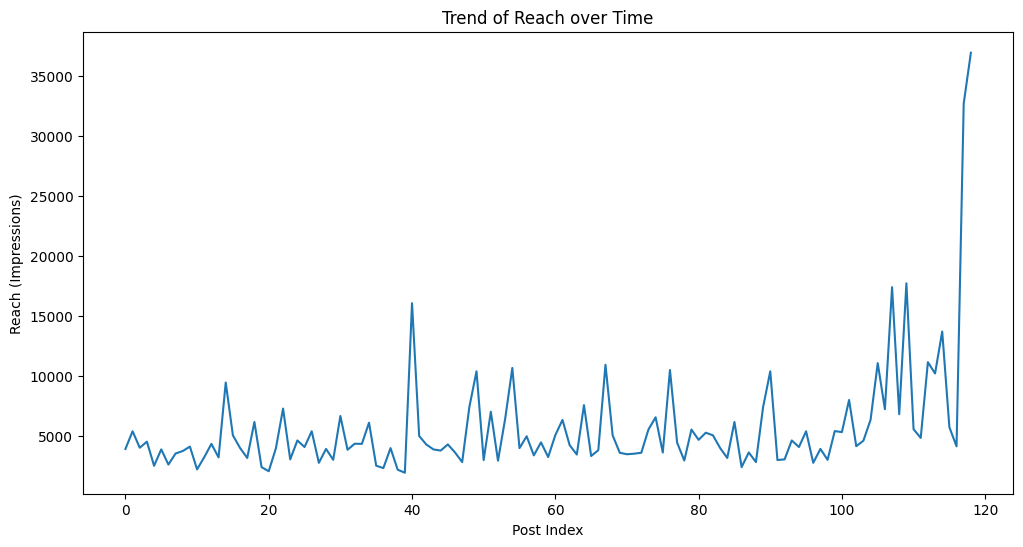

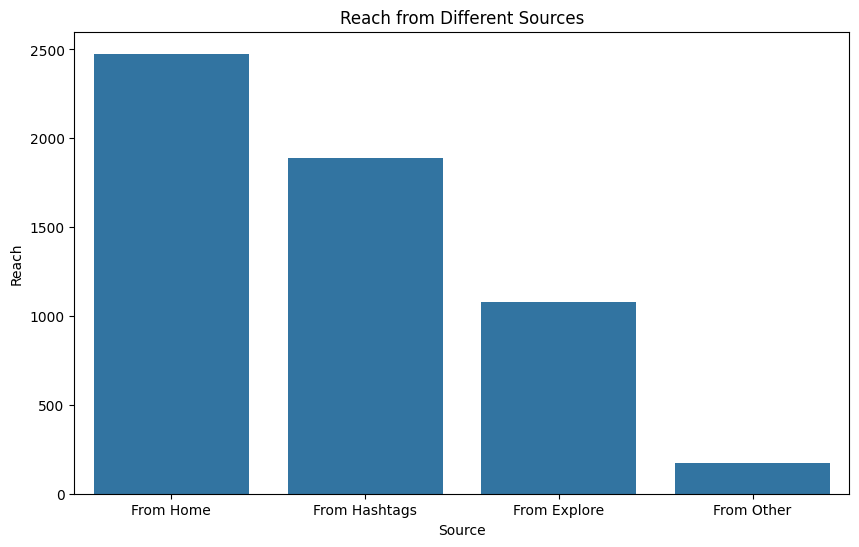

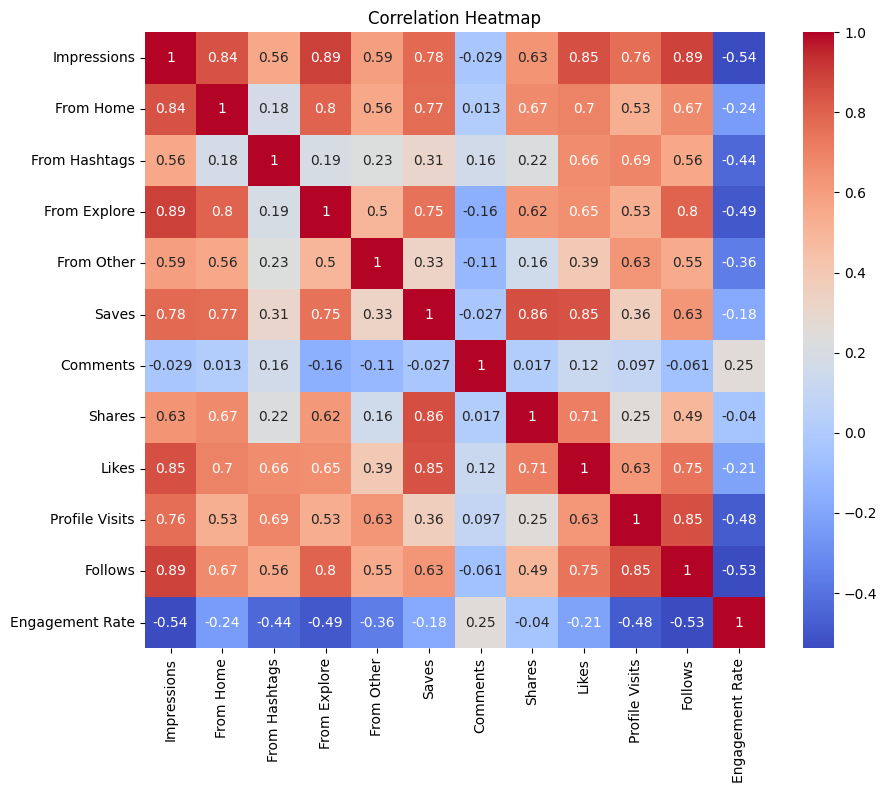

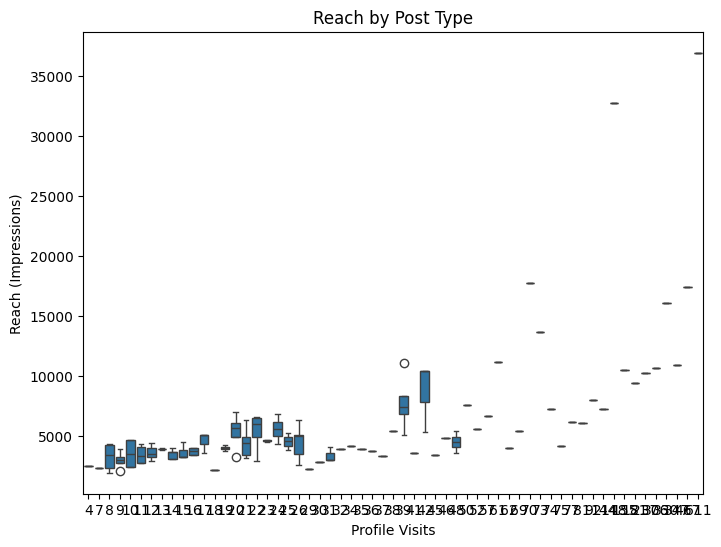

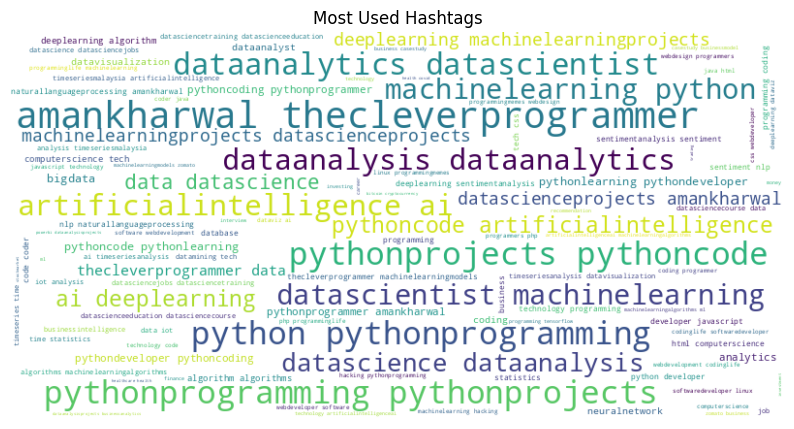

In [11]:
# Analyze trends and patterns in features
# Example 1: Trend of Reach over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Impressions'])
plt.xlabel('Post Index')
plt.ylabel('Reach (Impressions)')
plt.title('Trend of Reach over Time')
plt.show()

# Example 2: Bar chart of Reach from Different Sources
plt.figure(figsize=(10, 6))
sns.barplot(x=['From Home', 'From Hashtags', 'From Explore', 'From Other'],
            y=[df['From Home'].mean(), df['From Hashtags'].mean(), df['From Explore'].mean(), df['From Other'].mean()])
plt.xlabel('Source')
plt.ylabel('Reach')
plt.title('Reach from Different Sources')
plt.show()

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Analyze correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Analyze factors such as post type, time of posting, and content themes
# Example 3: Box plot of Reach by Post Type
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Profile Visits'], y=df['Impressions'])
plt.xlabel('Profile Visits')
plt.ylabel('Reach (Impressions)')
plt.title('Reach by Post Type')
plt.show()

# Example 4: Word cloud of the most used hashtags
from wordcloud import WordCloud

hashtags = ' '.join(df['Hashtags'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Hashtags')
plt.show()

**Predictive Modeling**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Select the relevant features for prediction
X = df[['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']]
y = df['Impressions']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select and train the machine learning model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
# Use the trained model to predict the reach for new or future posts
new_data = pd.DataFrame({
    'From Home': [10],  # Example value, adjust according to your needs
    'From Hashtags': [5],  # Example value, adjust according to your needs
    'From Explore': [2],  # Example value, adjust according to your needs
    'From Other': [3],  # Example value, adjust according to your needs
    'Saves': [50],  # Example value, adjust according to your needs
    'Comments': [20],  # Example value, adjust according to your needs
    'Shares': [10],  # Example value, adjust according to your needs
    'Likes': [100],  # Example value, adjust according to your needs
    'Profile Visits': [30],  # Example value, adjust according to your needs
    'Follows': [5]  # Example value, adjust according to your needs
})

predicted_reach = model.predict(new_data)
print("Predicted Reach:", predicted_reach)

Mean Squared Error: 15766.2264963091
R-squared: 0.99959404890355
Predicted Reach: [82.23340518]


**Interpretation and Recommendations**

In [13]:
from sklearn.linear_model import LinearRegression


# Select the relevant features for prediction
X = df[['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']]
y = df['Impressions']

# Train the machine learning model
model = LinearRegression()
model.fit(X, y)

# Interpret the coefficients or feature importances
coefficients = model.coef_
feature_importances = abs(coefficients) / abs(coefficients).sum()
# Identify the key factors that significantly influence reach
key_factors = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Feature Importance': feature_importances
})
key_factors = key_factors.sort_values(by='Coefficient', ascending=False)

# Print the key factors and their impact on reach
print(key_factors)


          Feature  Coefficient  Feature Importance
3      From Other     1.083024            0.117865
6          Shares     1.014369            0.110394
2    From Explore     1.007242            0.109618
0       From Home     1.001839            0.109030
1   From Hashtags     0.999318            0.108756
9         Follows     0.502452            0.054682
7           Likes     0.184422            0.020071
8  Profile Visits    -0.197059            0.021446
4           Saves    -0.318018            0.034610
5        Comments    -2.880908            0.313529
